In [24]:
from PIL import Image
import os
import numpy as np
from collections import OrderedDict

results = ['ESRGAN_gray_x4_01_v2', 'ESRGAN_gray_x4_02_v2', 'ESRGAN_gray_x4_03_v2', 'ESRGAN_gray_x4_04_v2']
# main_test_results = ['test_gray4', 'test_gray6']
test_results = ['test1_gray', 'test2_gray', 'test3_gray', 'test4_gray', 'test5_gray']
# 応力の範囲
stress_list = [[1.186, 29780],[181.1, 27820],[0.6415, 1537],[14.18, 31050],[45.58, 7099]]

current_dir = os.getcwd()

# images_dir = current_dir + '/' + results[0] + '/visualization/dataset_test_grayscale_v2/'
# images = os.listdir(images_dir)
# images = [i for i in images if os.path.isfile(os.path.join(images_dir, i))]

gt_dir = '/Users/maruyan/Desktop/鈴木研/SR_experiments/BasicSR/datasets/dataset_test_grayscale_v2/gt/'
gt_images = [Image.open(gt_dir + i + '.png').convert('L') for i in test_results]
lq_dir = '/Users/maruyan/Desktop/鈴木研/SR_experiments/BasicSR/datasets/dataset_test_grayscale_v2/lq/'
lq_images = [Image.open(lq_dir + i + '.png').convert('L') for i in test_results]

additional_test_model1_dir = '/Users/maruyan/desktop/鈴木研/SR_experiments/additional_result/additional_test_1/'
additional_test_model2_dir = '/Users/maruyan/desktop/鈴木研/SR_experiments/additional_result/additional_test_2/'

additional_test_model1_images = [Image.open(additional_test_model1_dir + i + '_400000.png').convert('L') for i in test_results]
additional_test_model2_images = [Image.open(additional_test_model2_dir + i + '_400000.png').convert('L') for i in test_results]

def get_test_images(result_case):
    get_dir = current_dir + '/' + results[result_case] + '/visualization/dataset_test_grayscale_v2/'
    return [Image.open(get_dir + i + '_' + results[result_case] + '.png').convert('L') for i in test_results]



In [2]:
stress_results = OrderedDict()
for i in results:
    stress_results[i] = OrderedDict()

In [3]:
def compute_max_stress_ratio(test_index, min_lum):
    max_stress = stress_list[test_index][1]
    min_stress = stress_list[test_index][0]
    max_stress_predict = max_stress - ((max_stress - min_stress) / 255) * min_lum
    max_ratio = max_stress_predict / max_stress
#     result = OrderedDict()
#     result['max_stress'] = max_stress
#     result['max_ratio'] = max_ratio
    return max_ratio

In [4]:
def compute_average_error_ratio(test_img, test_index, max_pixel):
    gt_img = cropped_gt_images[test_index]
    gt_min_pixels = stress_high_pixels(gt_img, max_pixel)
    pixel_num = gt_min_pixels[0].size
    error_sum = 0
    for i in range(pixel_num):
        x = gt_min_pixels[0][i]
        y = gt_min_pixels[1][i]
#         print(np.array(test_img)[x, y])
        error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])
#         print(error)
        error_sum += error
    max_stress = stress_list[test_index][1]
    min_stress = stress_list[test_index][0]
    average_error = (error_sum / pixel_num) * ((max_stress - min_stress) / 255)
    print(pixel_num)
#     print(error_sum)
#     print(max_stress, min_stress)
    print(error_sum / pixel_num)
    print(average_error / max_stress)
    return average_error / max_stress

In [5]:
cropped_gt_images = []
cropped_gt_images

[]

In [6]:
gt_images[0].crop((400,0,1024,704))
cropped_gt_images.append(gt_images[0].crop((400,0,1024,704)))

In [7]:
gt_images[1].crop((400,0,1024,704))
cropped_gt_images.append(gt_images[1].crop((400,0,1024,704)))

In [8]:
gt_images[2].crop((40, 100, 1384, 604))
cropped_gt_images.append(gt_images[2].crop((40,100,1384,604)))

In [9]:
gt_images[3].crop((300, 0, 1124, 704))
cropped_gt_images.append(gt_images[3].crop((300,0,1124,704)))

In [10]:
gt_images[4].crop((300,0,1124,704))
cropped_gt_images.append(gt_images[4].crop((300,0,1124,704)))

In [11]:
def stress_high_pixels(gt_img, max_pixel):
    array = np.array(gt_img)
#     flat_array = array.flatten()
#     first_quarter = np.percentile(flat_array[flat_array < 255], 20)
#     print(first_quarter)
    return np.where(array < max_pixel)
# ji = np.array(cropped_gt_images[1]).flatten()
# np.percentile(ji[ji < 255], 25)

In [27]:
a = stress_high_pixels(cropped_gt_images[0], 128)
a

(array([152, 152, 152, ..., 548, 548, 548]),
 array([ 99, 100, 101, ..., 100, 101, 102]))

In [26]:
compute_average_error_ratio(cropped_lq_images[0], 0, 128)

<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


1296
69.35185185185185
0.2719572152453748


0.2719572152453748

1296


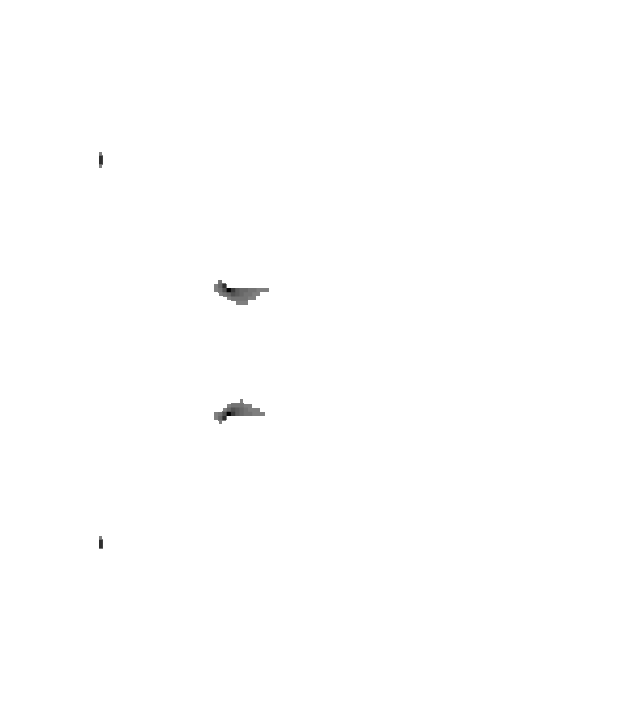

In [12]:
ar = np.array(cropped_gt_images[0])
where = np.where(ar < 128)
print(np.where(ar < 128)[0].size)
Image.fromarray(np.where(ar < 128, ar, 255))
# Image.fromarray(ar)

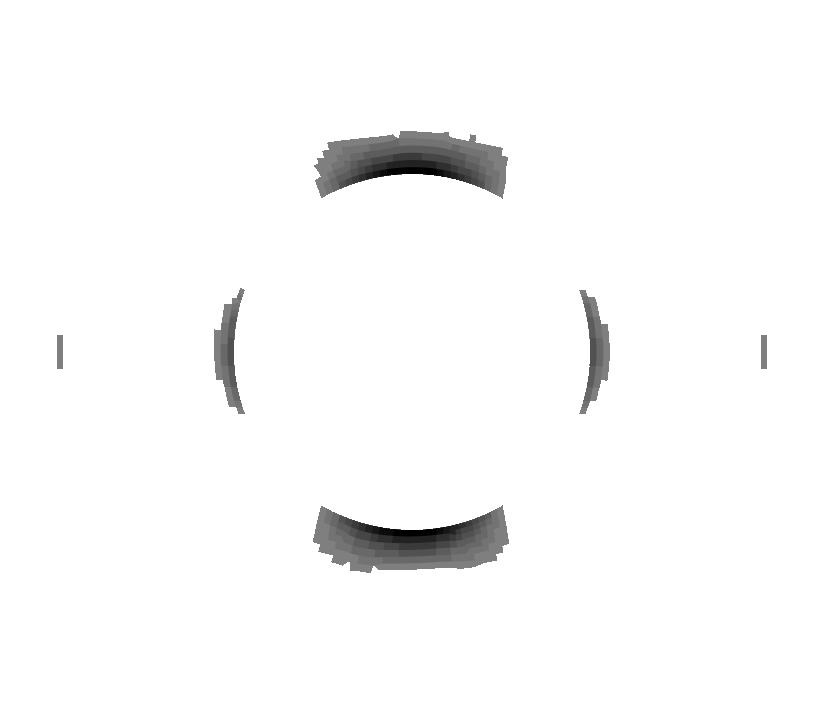

In [21]:
# m1_image_test1 = np.array(m1_images[0].crop((400,0,1024,704)))
ar = np.array(cropped_gt_images[4])
# compute_average_error_ratio(m1_image_test5, 4, 128)
Image.fromarray(np.where(ar < 128, cropped_gt_images[4], 255))

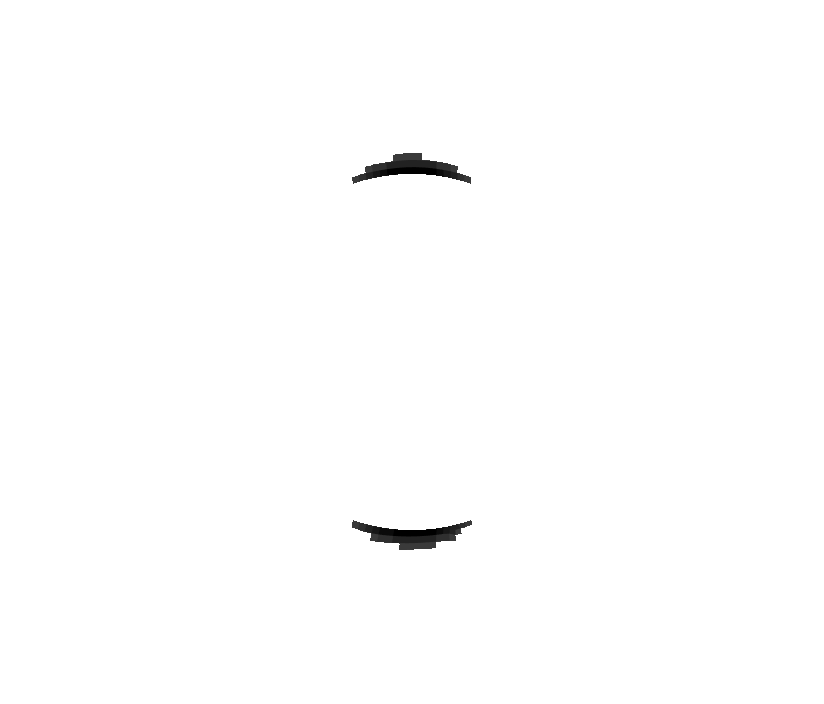

In [41]:
ar = np.array(cropped_gt_images[4])
# compute_average_error_ratio(m1_image_test5, 4, 128)
Image.fromarray(np.where(ar < 64, cropped_gt_images[4], 255))

In [15]:
m1_images = get_test_images(0)

In [16]:
# model1 test1
m1_images = get_test_images(0)
m1_image_test1 = m1_images[0].crop((400,0,1024,704))
# m1_image_test1
# cropped_gt_images[0]
m1_test1_max = compute_max_stress_ratio(0, np.array(m1_image_test1).flatten().min())
m1_test1_error = compute_average_error_ratio(m1_image_test1, 0, 128)
# np.abs(1 - 10)
m1_test1_error

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


1296
86.32716049382717
0.3385244018875449


0.3385244018875449

In [101]:
stress_results[results[0]][test_results[0]] = OrderedDict()
stress_results[results[0]][test_results[0]]["max_ratio"] = m1_test1_max
stress_results[results[0]][test_results[0]]["average_error_ratio_128"] = m1_test1_error
stress_results

OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)]))])),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('lq', OrderedDict())])

In [28]:
# model1 test2
m1_image_test2 = m1_images[1].crop((400,0,1024,704))
m1_test2_max = compute_max_stress_ratio(1, np.array(m1_image_test2).flatten().min())
m1_test2_error = compute_average_error_ratio(m1_image_test2, 1,128)
print(m1_test2_max, m1_test2_error)

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


17083
142.93022302874203
0.556861919238395
1.0 0.556861919238395


In [103]:
stress_results[results[0]][test_results[1]] = OrderedDict()
stress_results[results[0]][test_results[1]]["max_ratio"] = m1_test2_max
stress_results[results[0]][test_results[1]]["average_error_ratio_128"] = m1_test2_error
stress_results

OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)]))])),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('lq', OrderedDict())])

In [29]:
# model1 test3
m1_image_test3 = m1_images[2].crop((40,100,1384,604))
m1_test3_max = compute_max_stress_ratio(2, np.array(m1_image_test3).flatten().min())
m1_test3_error = compute_average_error_ratio(m1_image_test3, 2, 128)
stress_results[results[0]][test_results[2]] = OrderedDict()
stress_results[results[0]][test_results[2]]["max_ratio"] = m1_test3_max
stress_results[results[0]][test_results[2]]["average_error_ratio_128"] = m1_test3_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


57909
100.00319466749555
0.39200571052486116


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)]))])),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict())])

In [24]:
# model1 test4
m1_image_test4 = m1_images[3].crop((300,0,1124,704))
m1_test4_max = compute_max_stress_ratio(3, np.array(m1_image_test4).flatten().min())
m1_test4_error = compute_average_error_ratio(m1_image_test4, 3, 128)
stress_results[results[0]][test_results[3]] = OrderedDict()
stress_results[results[0]][test_results[3]]["max_ratio"] = m1_test4_max
stress_results[results[0]][test_results[3]]["average_error_ratio_128"] = m1_test4_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


2752
75.63408430232558
0.2964687981145909


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)]))])),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict())])

In [30]:
# model1 test5
m1_image_test5 = m1_images[4].crop((300,0,1124,704))
m1_test5_max = compute_max_stress_ratio(4, np.array(m1_image_test5).flatten().min())
m1_test5_error = compute_average_error_ratio(m1_image_test5, 4, 128)
stress_results[results[0]][test_results[4]] = OrderedDict()
stress_results[results[0]][test_results[4]]["max_ratio"] = m1_test5_max
stress_results[results[0]][test_results[4]]["average_error_ratio_128"] = m1_test5_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


20891
137.98506533914124
0.5376435894392226


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test5_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.5376435894392226)]))])),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict())])

In [108]:
m2_images = get_test_images(1)

In [109]:
# model2 test1
m2_image_test1 = m2_images[0].crop((400,0,1024,704))
m2_test1_max = compute_max_stress_ratio(0, np.array(m2_image_test1).flatten().min())
m2_test1_error = compute_average_error_ratio(m2_image_test1, 0, 128)
print(m2_test1_max, m2_test1_error)

1296
148.66280864197532
0.5829681885812265
0.011804062734563284 0.5829681885812265


In [110]:
stress_results[results[1]][test_results[0]] = OrderedDict()
stress_results[results[1]][test_results[0]]["max_ratio"] = m2_test1_max
stress_results[results[1]][test_results[0]]["average_error_ratio_128"] = m2_test1_error
stress_results

OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [111]:
# model2 test2
m2_image_test2 = m2_images[1].crop((400,0,1024,704))
m2_test2_max = compute_max_stress_ratio(1, np.array(m2_image_test2).flatten().min())
m2_test2_error = compute_average_error_ratio(m2_image_test2, 1, 128)
stress_results[results[1]][test_results[1]] = OrderedDict()
stress_results[results[1]][test_results[1]]["max_ratio"] = m2_test2_max
stress_results[results[1]][test_results[1]]["average_error_ratio_128"] = m2_test2_error
stress_results

17083
143.28771293098401
0.5582547143299607


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [238]:
compute_average_error_ratio(m2_image_test2, 1)

130
27447
27820 181.1


0.8225740006050533

In [250]:
stress_results[results[1]][test_results[1]]["average_error_ratio"] = compute_average_error_ratio(m2_image_test2, 1)
stress_results

130
0.8225740006050533


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio',
                                          0.32697499500512833)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio',
                                          0.38537833183154363)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio',
                                          0.12399508736867147)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio',
                                          0.2017285602421323)])),
        

In [112]:
# model2 test3
m2_image_test3 = m2_images[2].crop((40,100,1384,604))
m2_test3_max = compute_max_stress_ratio(2, np.array(m2_image_test3).flatten().min())
m2_test3_error = compute_average_error_ratio(m2_image_test3, 2, 128)
stress_results[results[1]][test_results[2]] = OrderedDict()
stress_results[results[1]][test_results[2]]["max_ratio"] = m2_test3_max
stress_results[results[1]][test_results[2]]["average_error_ratio_128"] = m2_test3_error
stress_results

57909
159.73978138113247
0.6261690609745101


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [113]:
# model2 test4
m2_image_test4 = m2_images[3].crop((300,0,1124,704))
m2_test4_max = compute_max_stress_ratio(3, np.array(m2_image_test4).flatten().min())
m2_test4_error = compute_average_error_ratio(m2_image_test4, 3, 128)
stress_results[results[1]][test_results[3]] = OrderedDict()
stress_results[results[1]][test_results[3]]["max_ratio"] = m2_test4_max
stress_results[results[1]][test_results[3]]["average_error_ratio_128"] = m2_test4_error
stress_results

2752
137.32412790697674
0.5382800562505645


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [114]:
# model2 test5
m2_image_test5 = m2_images[4].crop((300,0,1124,704))
m2_test5_max = compute_max_stress_ratio(4, np.array(m2_image_test5).flatten().min())
m2_test5_error = compute_average_error_ratio(m2_image_test5, 4, 128)
stress_results[results[1]][test_results[4]] = OrderedDict()
stress_results[results[1]][test_results[4]]["max_ratio"] = m2_test5_max
stress_results[results[1]][test_results[4]]["average_error_ratio_128"] = m2_test5_error
stress_results

20891
157.06878560145518
0.6120012007971385


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

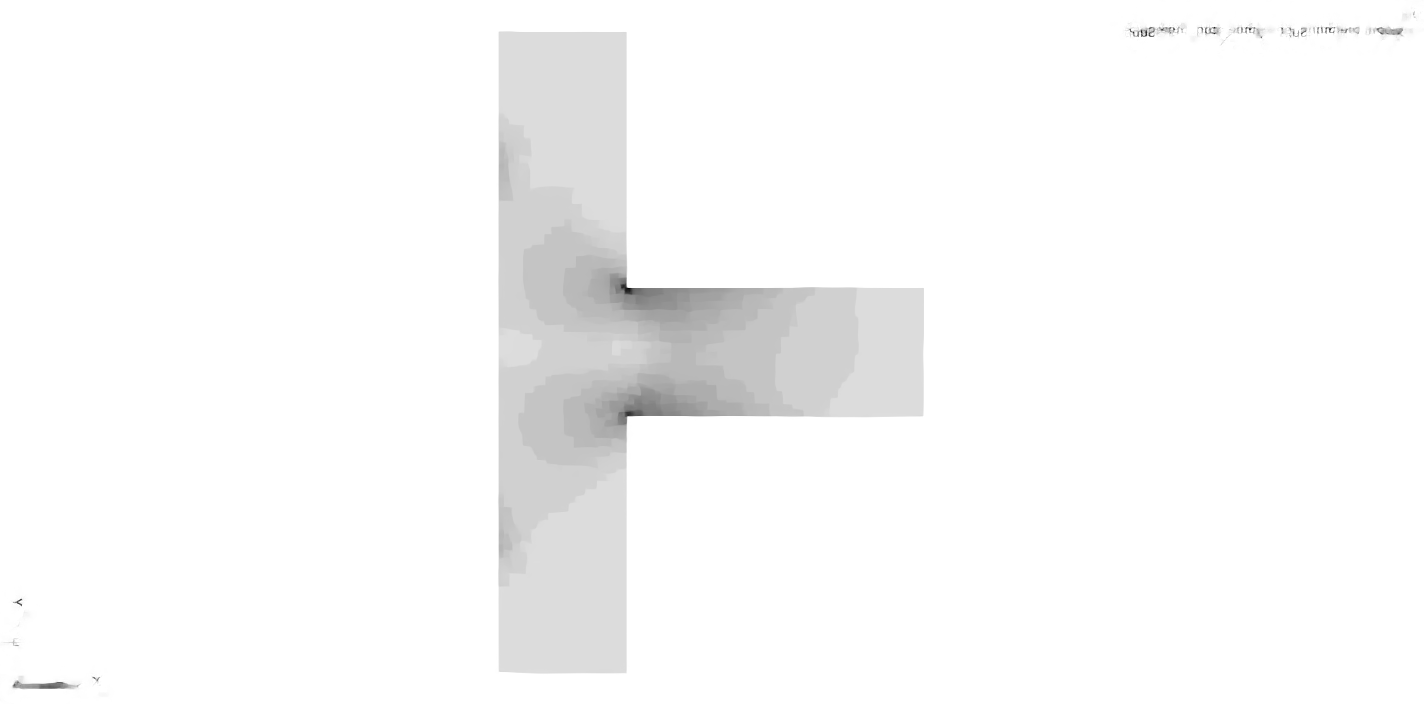

In [115]:
#model3 
m3_images = get_test_images(2)
m3_images[0]

In [116]:
# model3 test1
m3_image_test1 = m3_images[0].crop((400,0,1024,704))
m3_test1_max = compute_max_stress_ratio(0, np.array(m3_image_test1).flatten().min())
m3_test1_error = compute_average_error_ratio(m3_image_test1, 0, 128)
stress_results[results[2]][test_results[0]] = OrderedDict()
stress_results[results[2]][test_results[0]]["max_ratio"] = m3_test1_max
stress_results[results[2]][test_results[0]]["average_error_ratio_128"] = m3_test1_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


1296
41.905092592592595
0.16432715178861884


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [117]:
# model3 test2
m3_image_test2 = m3_images[1].crop((400,0,1024,704))
m3_test2_max = compute_max_stress_ratio(1, np.array(m3_image_test2).flatten().min())
m3_test2_error = compute_average_error_ratio(m3_image_test2, 1, 128)
stress_results[results[2]][test_results[1]] = OrderedDict()
stress_results[results[2]][test_results[1]]["max_ratio"] = m3_test2_max
stress_results[results[2]][test_results[1]]["average_error_ratio_128"] = m3_test2_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


17083
138.55476204413745
0.5398149465981182


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [118]:
# model3 test3
m3_image_test3 = m3_images[2].crop((40,100,1384,604))
m3_test3_max = compute_max_stress_ratio(2, np.array(m3_image_test3).flatten().min())
m3_test3_error = compute_average_error_ratio(m3_image_test3, 2, 128)
stress_results[results[2]][test_results[2]] = OrderedDict()
stress_results[results[2]][test_results[2]]["max_ratio"] = m3_test3_max
stress_results[results[2]][test_results[2]]["average_error_ratio_128"] = m3_test3_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


57909
66.57849384378939
0.2609831603049064


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [119]:
# model3 test4
m3_image_test4 = m3_images[3].crop((300,0,1124,704))
m3_test4_max = compute_max_stress_ratio(3, np.array(m3_image_test4).flatten().min())
m3_test4_error = compute_average_error_ratio(m3_image_test4, 3, 128)
stress_results[results[2]][test_results[3]] = OrderedDict()
stress_results[results[2]][test_results[3]]["max_ratio"] = m3_test4_max
stress_results[results[2]][test_results[3]]["average_error_ratio_128"] = m3_test4_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


2752
52.805595930232556
0.2069861981350043


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [120]:
# model3 test5
m3_image_test5 = m3_images[4].crop((300,0,1124,704))
m3_test5_max = compute_max_stress_ratio(4, np.array(m3_image_test5).flatten().min())
m3_test5_error = compute_average_error_ratio(m3_image_test5, 4, 128)
stress_results[results[2]][test_results[4]] = OrderedDict()
stress_results[results[2]][test_results[4]]["max_ratio"] = m3_test5_max
stress_results[results[2]][test_results[4]]["average_error_ratio_128"] = m3_test5_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


20891
130.9369584988751
0.5101814184351486


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

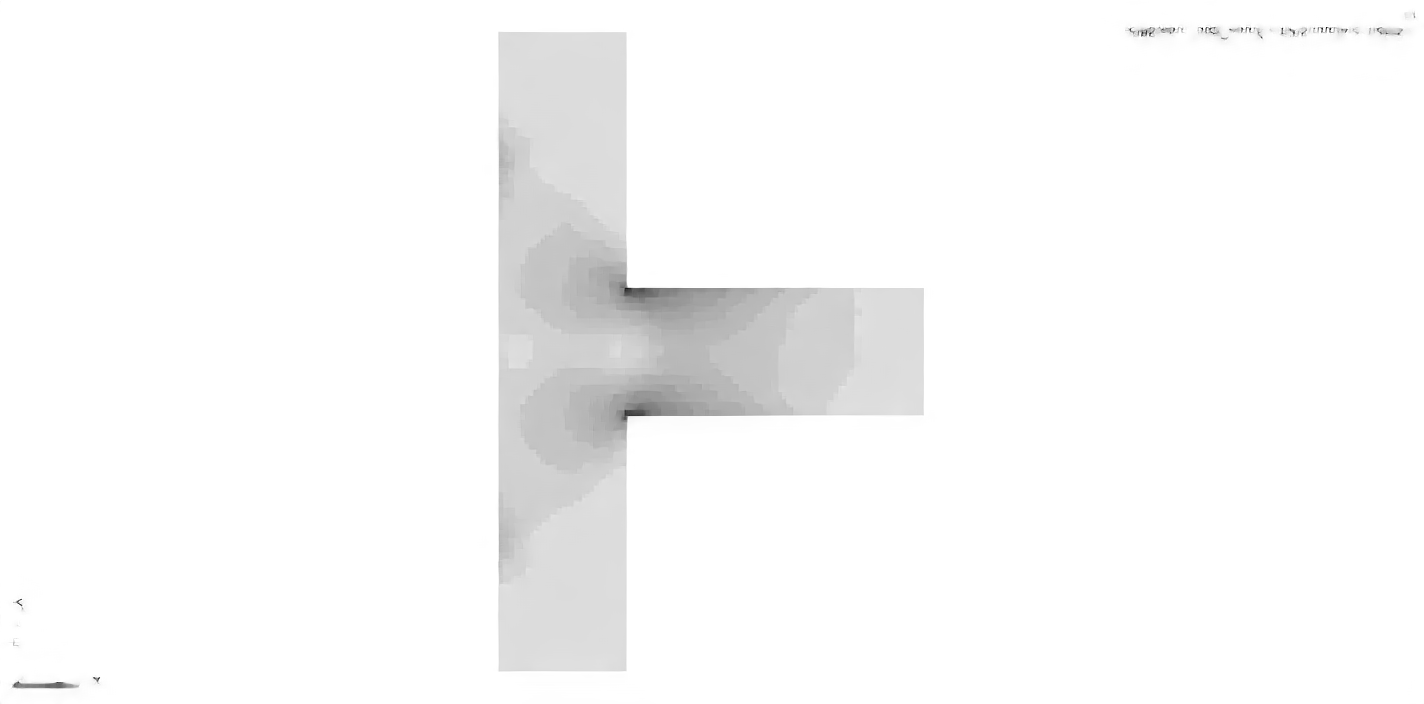

In [121]:
#model4
m4_images = get_test_images(3)
m4_images[0]

In [122]:
# model4 test1
m4_image_test1 = m4_images[0].crop((400,0,1024,704))
m4_test1_max = compute_max_stress_ratio(0, np.array(m4_image_test1).flatten().min())
m4_test1_error = compute_average_error_ratio(m4_image_test1, 0, 128)
stress_results[results[3]][test_results[0]] = OrderedDict()
stress_results[results[3]][test_results[0]]["max_ratio"] = m4_test1_max
stress_results[results[3]][test_results[0]]["average_error_ratio_128"] = m4_test1_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


1296
90.1604938271605
0.3535564829438313


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [123]:
# model4 test2
m4_image_test2 = m4_images[1].crop((400,0,1024,704))
m4_test2_max = compute_max_stress_ratio(1, np.array(m4_image_test2).flatten().min())
m4_test2_error = compute_average_error_ratio(m4_image_test2, 1, 128)
stress_results[results[3]][test_results[1]] = OrderedDict()
stress_results[results[3]][test_results[1]]["max_ratio"] = m4_test2_max
stress_results[results[3]][test_results[1]]["average_error_ratio_128"] = m4_test2_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


17083
76.98343382309899
0.2999305661173723


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [124]:
# model4 test3
m4_image_test3 = m4_images[2].crop((40,100,1384,604))
m4_test3_max = compute_max_stress_ratio(2, np.array(m4_image_test3).flatten().min())
m4_test3_error = compute_average_error_ratio(m4_image_test3, 2, 128)
stress_results[results[3]][test_results[2]] = OrderedDict()
stress_results[results[3]][test_results[2]]["max_ratio"] = m4_test3_max
stress_results[results[3]][test_results[2]]["average_error_ratio_128"] = m4_test3_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


57909
25.127665820511492
0.09849873823083496


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [125]:
# model4 test4
m4_image_test4 = m4_images[3].crop((300,0,1124,704))
m4_test4_max = compute_max_stress_ratio(3, np.array(m4_image_test4).flatten().min())
m4_test4_error = compute_average_error_ratio(m4_image_test4, 3, 128)
stress_results[results[3]][test_results[3]] = OrderedDict()
stress_results[results[3]][test_results[3]]["max_ratio"] = m4_test4_max
stress_results[results[3]][test_results[3]]["average_error_ratio_128"] = m4_test4_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


2752
43.432412790697676
0.17024540374952363


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [126]:
# model4 test5
m4_image_test5 = m4_images[4].crop((300,0,1124,704))
m4_test5_max = compute_max_stress_ratio(4, np.array(m4_image_test5).flatten().min())
m4_test5_error = compute_average_error_ratio(m4_image_test5, 4, 128)
stress_results[results[3]][test_results[4]] = OrderedDict()
stress_results[results[3]][test_results[4]]["max_ratio"] = m4_test5_max
stress_results[results[3]][test_results[4]]["average_error_ratio_128"] = m4_test5_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


20891
72.86984826001627
0.28392932730882503


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [20]:
import pandas as pd

In [277]:
pd.DataFrame(stress_results[results[0]])

,test1_gray,test2_gray,test3_gray,test4_gray,test5_gray
max_ratio,1.000000,1.000000,1.000000,0.956882,1.000000
average_error_ratio,0.326975,0.385378,0.123995,0.201729,0.404527


In [278]:
pd.DataFrame(stress_results[results[1]])

,test1_gray,test2_gray,test3_gray,test4_gray,test5_gray
max_ratio,0.011804,0.018198,0.016097,0.012216,0.018110
average_error_ratio,0.840707,0.822574,0.811848,0.948866,0.856117


In [279]:
pd.DataFrame(stress_results[results[3]])

,test1_gray,test2_gray,test3_gray,test4_gray,test5_gray
max_ratio,0.917650,0.894807,1.00000,1.00000,1.000000
average_error_ratio,0.316164,0.138909,0.13064,0.17667,0.353547


In [280]:
pd.DataFrame(stress_results[results[2]])

,test1_gray,test2_gray,test3_gray,test4_gray,test5_gray
max_ratio,0.980393,0.957144,1.000000,0.988241,1.000000
average_error_ratio,0.324333,0.172565,0.230777,0.067896,0.496102


In [14]:
cropped_lq_images = []

In [15]:
lq_images[0].crop((400,0,1024,704))
cropped_lq_images.append(lq_images[0].crop((400,0,1024,704)))

In [16]:
lq_images[1].crop((400,0,1024,704))
cropped_lq_images.append(lq_images[1].crop((400,0,1024,704)))

In [17]:
lq_images[2].crop((40, 100, 1384, 604))
cropped_lq_images.append(lq_images[2].crop((40,100,1384,604)))

In [18]:
lq_images[3].crop((300, 0, 1124, 704))
cropped_lq_images.append(lq_images[3].crop((300,0,1124,704)))

In [19]:
lq_images[4].crop((300,0,1124,704))
cropped_lq_images.append(lq_images[4].crop((300,0,1124,704)))

In [49]:
stress_results['lq'] = OrderedDict()
stress_results

OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('lq', OrderedDict())])

In [128]:
# lq test1
lq_image_test1 = cropped_lq_images[0]
lq_test1_max = compute_max_stress_ratio(0, np.array(lq_image_test1).flatten().min())
lq_test1_error = compute_average_error_ratio(lq_image_test1, 0, 128)
stress_results['lq'][test_results[0]] = OrderedDict()
stress_results['lq'][test_results[0]]["max_ratio"] = lq_test1_max
stress_results['lq'][test_results[0]]["average_error_ratio_128"] = lq_test1_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


1296
69.35185185185185
0.2719572152453748


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [129]:
# lq test2
lq_image_test2 = cropped_lq_images[1]
lq_test2_max = compute_max_stress_ratio(1, np.array(lq_image_test2).flatten().min())
lq_test2_error = compute_average_error_ratio(lq_image_test2, 1, 128)
stress_results['lq'][test_results[1]] = OrderedDict()
stress_results['lq'][test_results[1]]["max_ratio"] = lq_test2_max
stress_results['lq'][test_results[1]]["average_error_ratio_128"] = lq_test2_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


17083
185.1122168237429
0.7212046700173028


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [130]:
# lq test3
lq_image_test3 = cropped_lq_images[2]
lq_test3_max = compute_max_stress_ratio(2, np.array(lq_image_test3).flatten().min())
lq_test3_error = compute_average_error_ratio(lq_image_test3, 2, 128)
stress_results['lq'][test_results[2]] = OrderedDict()
stress_results['lq'][test_results[2]]["max_ratio"] = lq_test3_max
stress_results['lq'][test_results[2]]["average_error_ratio_128"] = lq_test3_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


57909
87.69661019876013
0.3437647377755286


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [131]:
# lq test4
lq_image_test4 = cropped_lq_images[3]
lq_test4_max = compute_max_stress_ratio(3, np.array(lq_image_test4).flatten().min())
lq_test4_error = compute_average_error_ratio(lq_image_test4, 3, 128)
stress_results['lq'][test_results[3]] = OrderedDict()
stress_results['lq'][test_results[3]]["max_ratio"] = lq_test4_max
stress_results['lq'][test_results[3]]["average_error_ratio_128"] = lq_test4_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


2752
42.54360465116279
0.16676147341159436


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [132]:
# lq test5
lq_image_test5 = cropped_lq_images[4]
lq_test5_max = compute_max_stress_ratio(4, np.array(lq_image_test5).flatten().min())
lq_test5_error = compute_average_error_ratio(lq_image_test5, 4, 128)
stress_results['lq'][test_results[4]] = OrderedDict()
stress_results['lq'][test_results[4]]["max_ratio"] = lq_test5_max
stress_results['lq'][test_results[4]]["average_error_ratio_128"] = lq_test5_error
stress_results

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


20891
82.72203341151692
0.3223172802054206


OrderedDict([('ESRGAN_gray_x4_01_v2',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.3385244018875449)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.556861919238395)])),
                           ('test3_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_128',
                                          0.39200571052486116)])),
                           ('test4_gray',
                            OrderedDict([('max_ratio', 0.9568824451390862),
                                         ('average_error_ratio_128',
                                          0.2964687981145909)

In [139]:
pd.DataFrame(stress_results['lq']).mean(1)

max_ratio                  0.730661
average_error_ratio_128    0.365201
dtype: float64

In [140]:
pd.DataFrame(stress_results[results[0]]).mean(1)

max_ratio                  0.991376
average_error_ratio_128    0.424301
dtype: float64

In [141]:
pd.DataFrame(stress_results[results[1]]).mean(1)

max_ratio                  0.015285
average_error_ratio_128    0.583535
dtype: float64

In [142]:
pd.DataFrame(stress_results[results[2]]).mean(1)

max_ratio                  0.985155
average_error_ratio_128    0.336459
dtype: float64

In [143]:
pd.DataFrame(stress_results[results[3]]).mean(1)

max_ratio                  0.962491
average_error_ratio_128    0.241232
dtype: float64

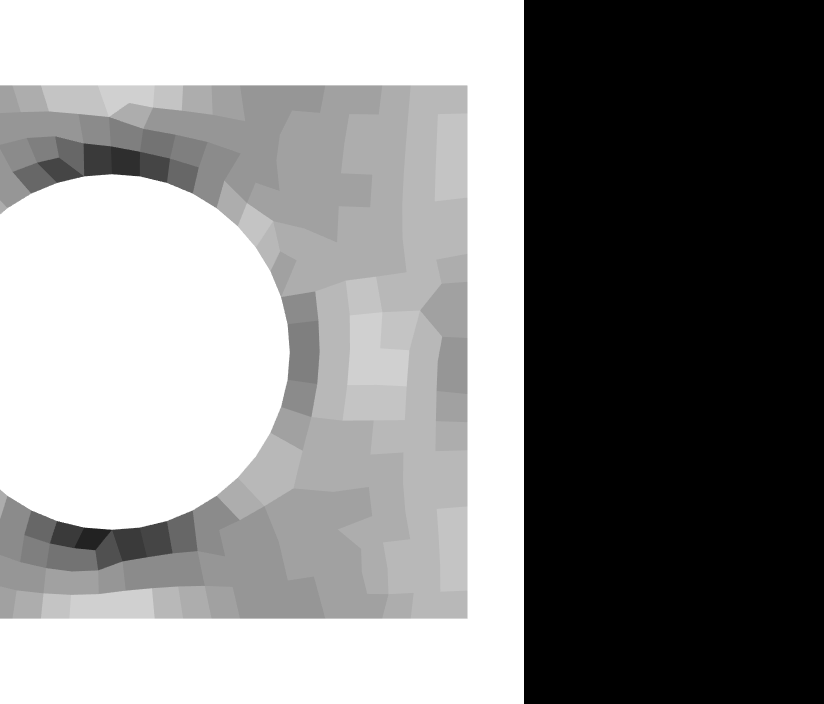

In [304]:
cropped_lq_images[4].crop((300,0,1124,704))

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


20891
0.3223172802054206


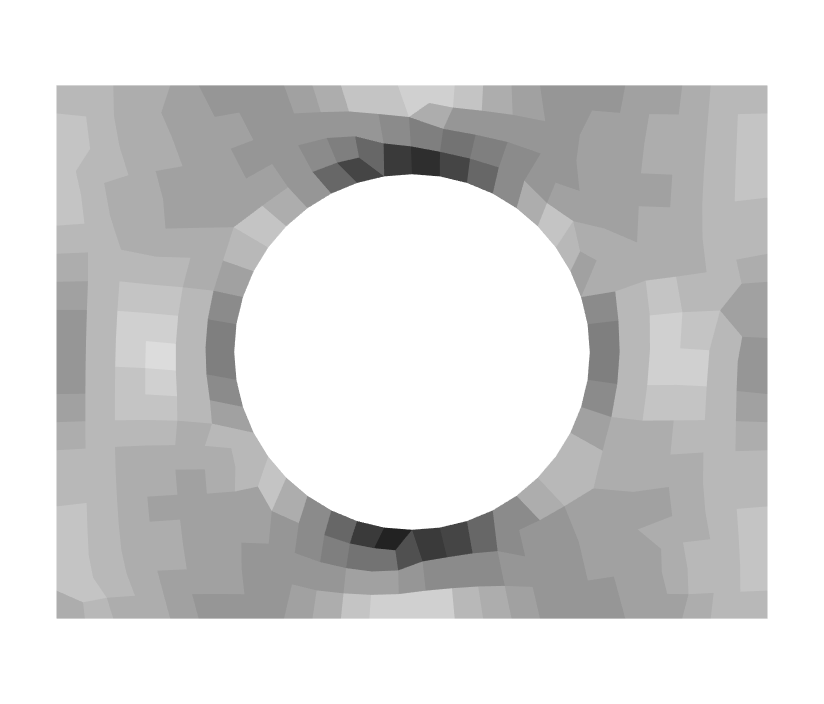

In [26]:
lq_image_test5 = cropped_lq_images[4]
compute_average_error_ratio(lq_image_test5, 4)
lq_image_test5

/Users/maruyan/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


20891
0.5376435894392226


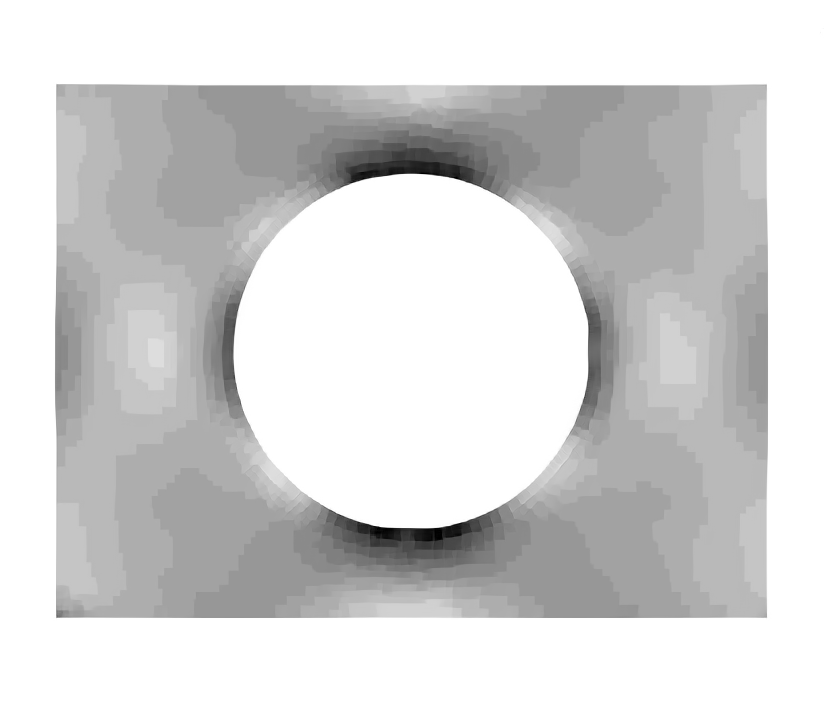

In [25]:
m1_image_test5 = m1_images[4].crop((300,0,1124,704))
m1_test5_max = compute_max_stress_ratio(4, np.array(m1_image_test5).flatten().min())
m1_test5_error = compute_average_error_ratio(m1_image_test5, 4)
m1_test5_error
m1_image_test5

In [29]:
# 以下追加実験結果の分析
stress_results['additional_test_1'] = OrderedDict()
stress_results['additional_test_2'] = OrderedDict()

In [32]:
ad_test1_img = additional_test_model1_images[0].crop((400,0,1024,704))
ad_test1_max = compute_max_stress_ratio(0, np.array(ad_test1_img).flatten().min())
ad_test1_error_64 = compute_average_error_ratio(ad_test1_img, 0, 64)
ad_test1_error_128 = compute_average_error_ratio(ad_test1_img, 0, 128)
stress_results['additional_test_1'][test_results[0]] = OrderedDict()
stress_results['additional_test_1'][test_results[0]]["max_ratio"] = ad_test1_max
stress_results['additional_test_1'][test_results[0]]["average_error_ratio_64"] = ad_test1_error_64
stress_results['additional_test_1'][test_results[0]]["average_error_ratio_128"] = ad_test1_error_128
stress_results

<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


144
79.40277777777777
0.3113710412999615
1296
41.986111111111114
0.16464485881577468


OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('additional_test_1',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.3113710412999615),
                                         ('average_error_ratio_128',
                                          0.16464485881577468)]))])),
             ('additional_test_2', OrderedDict())])

In [46]:
ad_test2_img = additional_test_model1_images[1].crop((400,0,1024,704))
ad_test2_max = compute_max_stress_ratio(1, np.array(ad_test2_img).flatten().min())
ad_test2_error_64 = compute_average_error_ratio(ad_test2_img, 1, 64)
ad_test2_error_128 = compute_average_error_ratio(ad_test2_img, 1, 128)
stress_results['additional_test_1'][test_results[1]] = OrderedDict()
stress_results['additional_test_1'][test_results[1]]["max_ratio"] = ad_test2_max
stress_results['additional_test_1'][test_results[1]]["average_error_ratio_64"] = ad_test2_error_64
stress_results['additional_test_1'][test_results[1]]["average_error_ratio_128"] = ad_test2_error_128
stress_results

130
48.41538461538462
0.18862829306693646


<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


17083
71.3634022127261
0.2780346960738241


OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('additional_test_1',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.3113710412999615),
                                         ('average_error_ratio_128',
                                          0.16464485881577468)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.18862829306693646),
                                         ('average_error_ratio_128',
                                          0.2780346960738241)])),
         

In [39]:
ad_test3_img = additional_test_model1_images[2].crop((40,100,1384,604))
ad_test3_max = compute_max_stress_ratio(2, np.array(ad_test3_img).flatten().min())
ad_test3_error_64 = compute_average_error_ratio(ad_test3_img, 2, 64)
ad_test3_error_128 = compute_average_error_ratio(ad_test3_img, 2, 128)
stress_results['additional_test_1'][test_results[2]] = OrderedDict()
stress_results['additional_test_1'][test_results[2]]["max_ratio"] = ad_test3_max
stress_results['additional_test_1'][test_results[2]]["average_error_ratio_64"] = ad_test3_error_64
stress_results['additional_test_1'][test_results[2]]["average_error_ratio_128"] = ad_test3_error_128
stress_results

<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


9515
30.54093536521282
0.119718386074975
57909
22.701600787442366
0.08898872857334449


OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('additional_test_1',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.3113710412999615),
                                         ('average_error_ratio_128',
                                          0.16464485881577468)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.18862829306693646),
                                         ('average_error_ratio_128',
                                          0.2780346960738241)])),
         

In [40]:
ad_test4_img = additional_test_model1_images[3].crop((300,0,1124,704))
ad_test4_max = compute_max_stress_ratio(3, np.array(ad_test4_img).flatten().min())
ad_test4_error_64 = compute_average_error_ratio(ad_test4_img, 3, 64)
ad_test4_error_128 = compute_average_error_ratio(ad_test4_img, 3, 128)
stress_results['additional_test_1'][test_results[3]] = OrderedDict()
stress_results['additional_test_1'][test_results[3]]["max_ratio"] = ad_test4_max
stress_results['additional_test_1'][test_results[3]]["average_error_ratio_64"] = ad_test4_error_64
stress_results['additional_test_1'][test_results[3]]["average_error_ratio_128"] = ad_test4_error_128
stress_results

84
39.20238095238095
0.15366461921752061


<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


2752
25.83030523255814
0.10124905481263397


OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('additional_test_1',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.3113710412999615),
                                         ('average_error_ratio_128',
                                          0.16464485881577468)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.18862829306693646),
                                         ('average_error_ratio_128',
                                          0.2780346960738241)])),
         

In [41]:
ad_test5_img = additional_test_model1_images[4].crop((300,0,1124,704))
ad_test5_max = compute_max_stress_ratio(4, np.array(ad_test5_img).flatten().min())
ad_test5_error_64 = compute_average_error_ratio(ad_test5_img, 4, 64)
ad_test5_error_128 = compute_average_error_ratio(ad_test5_img, 4, 128)
stress_results['additional_test_1'][test_results[4]] = OrderedDict()
stress_results['additional_test_1'][test_results[4]]["max_ratio"] = ad_test5_max
stress_results['additional_test_1'][test_results[4]]["average_error_ratio_64"] = ad_test5_error_64
stress_results['additional_test_1'][test_results[4]]["average_error_ratio_128"] = ad_test5_error_128
stress_results

<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


3344
77.8447966507177
0.3033136650520262
20891
54.263414867646354
0.21143141160216114


OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('additional_test_1',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.3113710412999615),
                                         ('average_error_ratio_128',
                                          0.16464485881577468)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.18862829306693646),
                                         ('average_error_ratio_128',
                                          0.2780346960738241)])),
         

In [43]:
ad2_test1_img = additional_test_model2_images[0].crop((400,0,1024,704))
ad2_test1_max = compute_max_stress_ratio(0, np.array(ad2_test1_img).flatten().min())
ad2_test1_error_64 = compute_average_error_ratio(ad2_test1_img, 0, 64)
ad2_test1_error_128 = compute_average_error_ratio(ad2_test1_img, 0, 128)
stress_results['additional_test_2'][test_results[0]] = OrderedDict()
stress_results['additional_test_2'][test_results[0]]["max_ratio"] = ad2_test1_max
stress_results['additional_test_2'][test_results[0]]["average_error_ratio_64"] = ad2_test1_error_64
stress_results['additional_test_2'][test_results[0]]["average_error_ratio_128"] = ad2_test1_error_128
stress_results

144
83.55555555555556
0.3276557957776051


<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


1296
39.016975308641975
0.1530016527158169


OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('additional_test_1',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.3113710412999615),
                                         ('average_error_ratio_128',
                                          0.16464485881577468)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.18862829306693646),
                                         ('average_error_ratio_128',
                                          0.2780346960738241)])),
         

In [47]:
ad2_test2_img = additional_test_model2_images[1].crop((400,0,1024,704))
ad2_test2_max = compute_max_stress_ratio(1, np.array(ad2_test2_img).flatten().min())
ad2_test2_error_64 = compute_average_error_ratio(ad2_test2_img, 1, 64)
ad2_test2_error_128 = compute_average_error_ratio(ad2_test2_img, 1, 128)
stress_results['additional_test_2'][test_results[1]] = OrderedDict()
stress_results['additional_test_2'][test_results[1]]["max_ratio"] = ad2_test2_max
stress_results['additional_test_2'][test_results[1]]["average_error_ratio_64"] = ad2_test2_error_64
stress_results['additional_test_2'][test_results[1]]["average_error_ratio_128"] = ad2_test2_error_128
stress_results

130
58.16923076923077
0.2266296714604661


<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


17083
152.0810747526781
0.5925140069891592


OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('additional_test_1',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.3113710412999615),
                                         ('average_error_ratio_128',
                                          0.16464485881577468)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.18862829306693646),
                                         ('average_error_ratio_128',
                                          0.2780346960738241)])),
         

In [48]:
ad2_test3_img = additional_test_model2_images[2].crop((40,100,1384,604))
ad2_test3_max = compute_max_stress_ratio(2, np.array(ad2_test3_img).flatten().min())
ad2_test3_error_64 = compute_average_error_ratio(ad2_test3_img, 2, 64)
ad2_test3_error_128 = compute_average_error_ratio(ad2_test3_img, 2, 128)
stress_results['additional_test_2'][test_results[2]] = OrderedDict()
stress_results['additional_test_2'][test_results[2]]["max_ratio"] = ad2_test3_max
stress_results['additional_test_2'][test_results[2]]["average_error_ratio_64"] = ad2_test3_error_64
stress_results['additional_test_2'][test_results[2]]["average_error_ratio_128"] = ad2_test3_error_128
stress_results

<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


9515
45.8282711508145
0.17964370092708903
57909
84.48624566129617
0.3311803274900697


OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('additional_test_1',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.3113710412999615),
                                         ('average_error_ratio_128',
                                          0.16464485881577468)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.18862829306693646),
                                         ('average_error_ratio_128',
                                          0.2780346960738241)])),
         

In [49]:
ad2_test4_img = additional_test_model2_images[3].crop((300,0,1124,704))
ad2_test4_max = compute_max_stress_ratio(3, np.array(ad2_test4_img).flatten().min())
ad2_test4_error_64 = compute_average_error_ratio(ad2_test4_img, 3, 64)
ad2_test4_error_128 = compute_average_error_ratio(ad2_test4_img, 3, 128)
stress_results['additional_test_2'][test_results[3]] = OrderedDict()
stress_results['additional_test_2'][test_results[3]]["max_ratio"] = ad2_test4_max
stress_results['additional_test_2'][test_results[3]]["average_error_ratio_64"] = ad2_test4_error_64
stress_results['additional_test_2'][test_results[3]]["average_error_ratio_128"] = ad2_test4_error_128
stress_results

84
45.916666666666664
0.17998312673002642


<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


2752
93.51199127906976
0.3665462194662346


OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('additional_test_1',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.3113710412999615),
                                         ('average_error_ratio_128',
                                          0.16464485881577468)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.18862829306693646),
                                         ('average_error_ratio_128',
                                          0.2780346960738241)])),
         

In [50]:
ad2_test5_img = additional_test_model2_images[4].crop((300,0,1124,704))
ad2_test5_max = compute_max_stress_ratio(4, np.array(ad2_test5_img).flatten().min())
ad2_test5_error_64 = compute_average_error_ratio(ad2_test5_img, 4, 64)
ad2_test5_error_128 = compute_average_error_ratio(ad2_test5_img, 4, 128)
stress_results['additional_test_2'][test_results[4]] = OrderedDict()
stress_results['additional_test_2'][test_results[4]]["max_ratio"] = ad2_test5_max
stress_results['additional_test_2'][test_results[4]]["average_error_ratio_64"] = ad2_test5_error_64
stress_results['additional_test_2'][test_results[4]]["average_error_ratio_128"] = ad2_test5_error_128
stress_results

<ipython-input-4-45eb5b0ff628>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  error = np.abs(np.array(test_img)[x, y] - np.array(gt_img)[x, y])


3344
96.48026315789474
0.37592470508862497
20891
129.0149825283615
0.5026926510307697


OrderedDict([('ESRGAN_gray_x4_01_v2', OrderedDict()),
             ('ESRGAN_gray_x4_02_v2', OrderedDict()),
             ('ESRGAN_gray_x4_03_v2', OrderedDict()),
             ('ESRGAN_gray_x4_04_v2', OrderedDict()),
             ('additional_test_1',
              OrderedDict([('test1_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.3113710412999615),
                                         ('average_error_ratio_128',
                                          0.16464485881577468)])),
                           ('test2_gray',
                            OrderedDict([('max_ratio', 1.0),
                                         ('average_error_ratio_64',
                                          0.18862829306693646),
                                         ('average_error_ratio_128',
                                          0.2780346960738241)])),
         

In [66]:
print('モデル1\(全損失あり\), discriminator_real_label = 0.8')
ad1_df = pd.DataFrame(stress_results['additional_test_1'])
ad1_df['average'] = ad1_df.mean(1)
ad1_df

モデル1\(全損失あり\), discriminator_real_label = 0.8


,test1_gray,test2_gray,test3_gray,test4_gray,test5_gray,average
max_ratio,1.000000,1.000000,1.000000,0.960802,1.000000,0.992160
average_error_ratio_64,0.311371,0.188628,0.119718,0.153665,0.303314,0.215339
average_error_ratio_128,0.164645,0.278035,0.088989,0.101249,0.211431,0.168870


In [68]:
print('モデル2\(知覚損失のみ\), discriminator_real_label = 0.9')
ad2_df = pd.DataFrame(stress_results['additional_test_2'])
ad2_df['average'] = ad2_df.mean(1)
ad2_df

モデル2\(知覚損失のみ\), discriminator_real_label = 0.9


,test1_gray,test2_gray,test3_gray,test4_gray,test5_gray,average
max_ratio,0.749030,0.941559,1.000000,0.847129,1.000000,0.907544
average_error_ratio_64,0.327656,0.226630,0.179644,0.179983,0.375925,0.257967
average_error_ratio_128,0.153002,0.592514,0.331180,0.366546,0.502693,0.389187
